# Setup

In [37]:
import importlib
import time
import os

import data_prep
import plotting
import mathing
import ml_method
import pandas as pd
import data_validation

In [38]:
importlib.reload(data_prep)
importlib.reload(plotting)
importlib.reload(mathing)
importlib.reload(ml_method)
importlib.reload(data_validation)

<module 'data_validation' from '/Users/hannesmoehring/Documents/Projekte/dev_fun/hypixel_bazaar/data_validation.py'>

In [5]:
DATA_DIR = "data/prod_data"

# Data loading and validation

#### load the data first time use or new data (this takes long)

In [ ]:
raw_data = data_prep.load_all_json(DATA_DIR)

df = data_prep.init_dataframe(raw_data)
df_copy = df.copy()
df.to_pickle(os.path.join("misc", "local_pickle", "cached_df.pkl"))
df

,time,productId,inst_sellPrice,sellVolume,inst_sellPastWeek,sellOrders,inst_buyPrice,buyVolume,inst_buyPastWeek,buyOrders,datetime
0,07-05_18-10,INK_SACK:3,2.000000,2065235,72546487,33,5.489783e+00,4093375,27113466,72,2025-05-07 18:10:00
1,07-05_18-10,INK_SACK:4,2.632312,1860949,126425500,30,7.400000e+00,1336264,5811563,49,2025-05-07 18:10:00
2,07-05_18-10,CORRUPTED_BAIT,33.800000,102756,389994,7,9.976080e+01,125437,539047,102,2025-05-07 18:10:00
3,07-05_18-10,ENCHANTMENT_ULTIMATE_NO_PAIN_NO_GAIN_2,0.000000,0,10,0,9.900000e+00,15,186,2,2025-05-07 18:10:00
4,07-05_18-10,TARANTULA_WEB,981.611069,7604604,52092622,174,1.052207e+03,1380453,5885321,275,2025-05-07 18:10:00
...,...,...,...,...,...,...,...,...,...,...,...
198985,07-05_23-50,ENCHANTMENT_TURBO_POTATO_1,3300.124242,1488,13529,18,1.196390e+04,397,3399,135,2025-05-07 23:50:00
198986,07-05_23-50,ENCHANTMENT_BANE_OF_ARTHROPODS_4,0.000000,0,0,0,0.000000e+00,0,0,0,2025-05-07 23:50:00
198987,07-05_23-50,ENCHANTMENT_ULTIMATE_WISDOM_3,571348.054545,223,139,18,1.149258e+06,344,402,50,2025-05-07 23:50:00
198988,07-05_23-50,ENCHANTMENT_TURBO_POTATO_2,1.300000,564,72,4,1.295996e+05,21,56,19,2025-05-07 23:50:00


#### load from local storage (fast)

In [6]:
df = pd.read_pickle(os.path.join("misc", "local_pickle", "cached_df.pkl"))

In [7]:
data_validation.routine(DATA_DIR)

Total files analyzed: 135
Total time differences: 134

Frequency of Time Differences:
10.00 minutes: 134 occurrences

Summary:
Average time difference: 10.00 minutes
Most common time difference: 10.00 minutes (134 occurrences)


# Example Products
- ENCHANTED_OAK_LOG
- ENCHANTED_JUNGLE_LOG
- ENCHANTED_ACACIA_LOG

<module 'matplotlib.pyplot' from '/Users/hannesmoehring/Documents/Projekte/dev_fun/hypixel_bazaar/venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

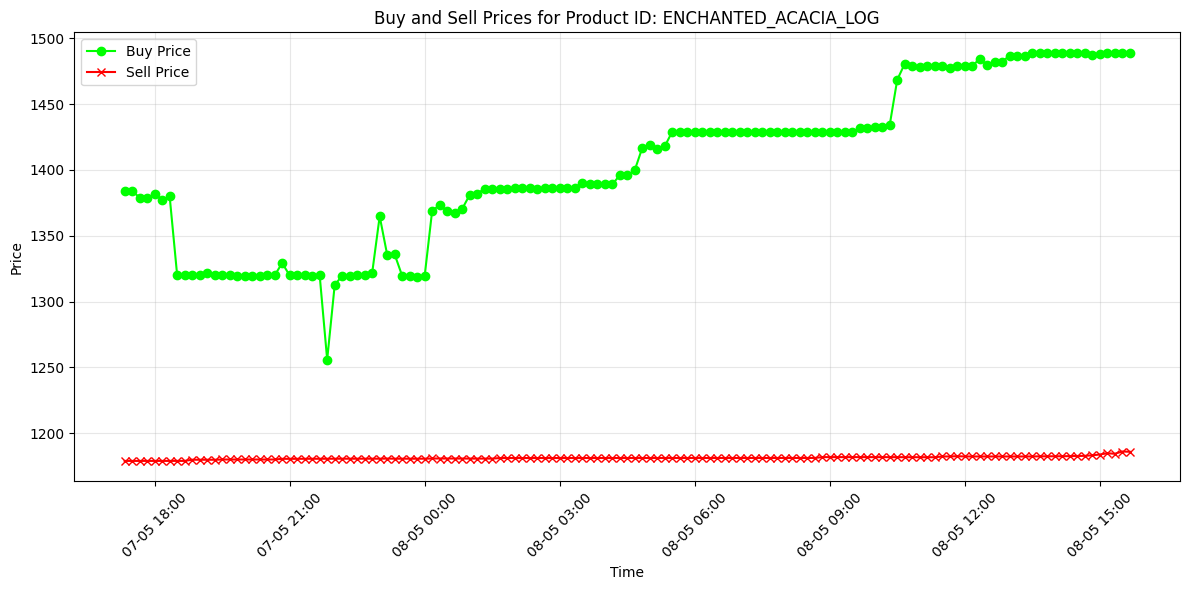

In [17]:
plotting.plot_product_prices(df,"ENCHANTED_ACACIA_LOG")

In [36]:
# mathing.fft_analysis(df, "ENCHANTED_ACACIA_LOG", "inst_buyPrice")

key_list = list(df["productId"].unique())
print(key_list)

temp_list: list[float] = []

for key in key_list:
    value, hours = mathing.fft_analysis(df, key, "inst_buyPrice")
    temp_list.append(value)

print(temp_list)

['INK_SACK:3', 'INK_SACK:4', 'CORRUPTED_BAIT', 'ENCHANTMENT_ULTIMATE_NO_PAIN_NO_GAIN_2', 'TARANTULA_WEB', 'ENCHANTMENT_ULTIMATE_NO_PAIN_NO_GAIN_1', 'DUNGEON_TRAP', 'DARK_ORB', 'ARCHITECT_FIRST_DRAFT', 'ENCHANTMENT_PROTECTION_7', 'ENCHANTMENT_PROTECTION_6', 'ESSENCE_DRAGON', 'RITUAL_RESIDUE', 'ENCHANTMENT_PROTECTION_1', 'GIANT_FRAGMENT_LASER', 'ENCHANTMENT_PROTECTION_5', 'ENCHANTED_MELON', 'ENCHANTMENT_PROTECTION_4', 'ENCHANTMENT_PROTECTION_3', 'ENCHANTMENT_PROTECTION_2', 'ENCHANTMENT_TURBO_COCO_1', 'ENCHANTMENT_TURBO_COCO_5', 'ENCHANTMENT_TURBO_COCO_4', 'ENCHANTMENT_TURBO_COCO_3', 'ENCHANTED_BLAZE_ROD', 'ENCHANTMENT_TURBO_COCO_2', 'ENCHANTED_BROWN_MUSHROOM', 'FRESHLY_MINTED_COINS', 'GOBLIN_EGG_YELLOW', 'PARTY_GIFT', 'ENCHANTED_GLISTERING_MELON', 'ENCHANTMENT_CORRUPTION_5', 'ENCHANTMENT_CORRUPTION_4', 'PROTECTOR_FRAGMENT', 'ENCHANTMENT_CORRUPTION_3', 'ENCHANTMENT_CORRUPTION_2', 'ENCHANTMENT_CORRUPTION_1', 'MAGMAG', 'ENCHANTED_MELON_BLOCK', 'ROCK_GEMSTONE', 'CONDENSED_FERMENTO', 'BEADY_E

/Users/hannesmoehring/Documents/Projekte/dev_fun/hypixel_bazaar/mathing.py:26: RuntimeWarning: invalid value encountered in scalar divide
  score: float = np.max(power_spectrum) / np.sum(


[np.float64(0.6323862020685099), np.float64(0.5911665907261535), np.float64(0.4330866596303994), np.float64(0.7843965769647951), np.float64(0.33907217598109457), np.float64(0.5038504279413635), np.float64(0.21722953873933937), np.float64(0.1401530162070349), np.float64(0.12564716301259138), np.float64(0.3379182073212425), np.float64(0.20418999753511657), np.float64(0.6239992814607342), np.float64(0.532924175224195), np.float64(nan), np.float64(0.37533400308022746), np.float64(nan), np.float64(0.5941218141199098), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(0.6214451440499896), np.float64(0.12049285007924297), np.float64(0.3471445459230639), np.float64(0.834326198826935), np.float64(0.3619154398056821), np.float64(0.4298804592774299), np.float64(0.2010179472723984), np.float64(0.5859577854771149), np.float64(0.593285600523961), np.float64(0.16372461372750927), np.float64(0.603633687683506), np.float64(0.7931718623563376), np.float64(0.12393527692401991), np.float64(0.3

# ML Method

In [8]:
test_products: list[str] = ["ENCHANTED_OAK_LOG", "BOOSTER_COOKIE", "ENCHANTED_RAW_SALMON", "FUMING_POTATO_BOOK"]

## Prophet


 Plot for ENCHANTED_OAK_LOG


16:16:23 - cmdstanpy - INFO - Chain [1] start processing
16:16:23 - cmdstanpy - INFO - Chain [1] done processing
16:16:24 - cmdstanpy - INFO - Chain [1] start processing



 Plot for BOOSTER_COOKIE


16:16:24 - cmdstanpy - INFO - Chain [1] done processing



 Plot for ENCHANTED_RAW_SALMON


16:16:24 - cmdstanpy - INFO - Chain [1] start processing
16:16:24 - cmdstanpy - INFO - Chain [1] done processing
16:16:24 - cmdstanpy - INFO - Chain [1] start processing



 Plot for FUMING_POTATO_BOOK


16:16:24 - cmdstanpy - INFO - Chain [1] done processing


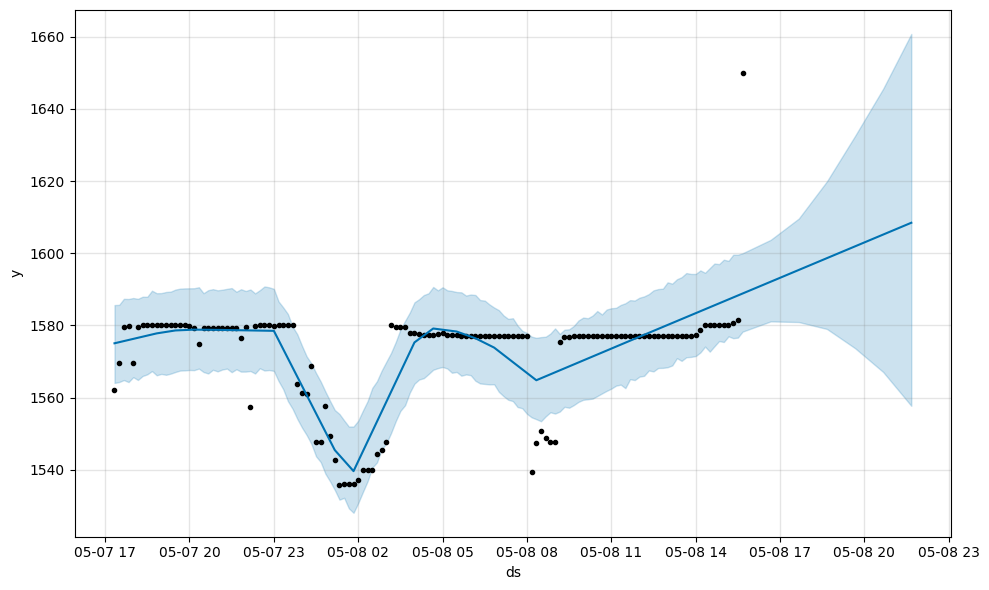

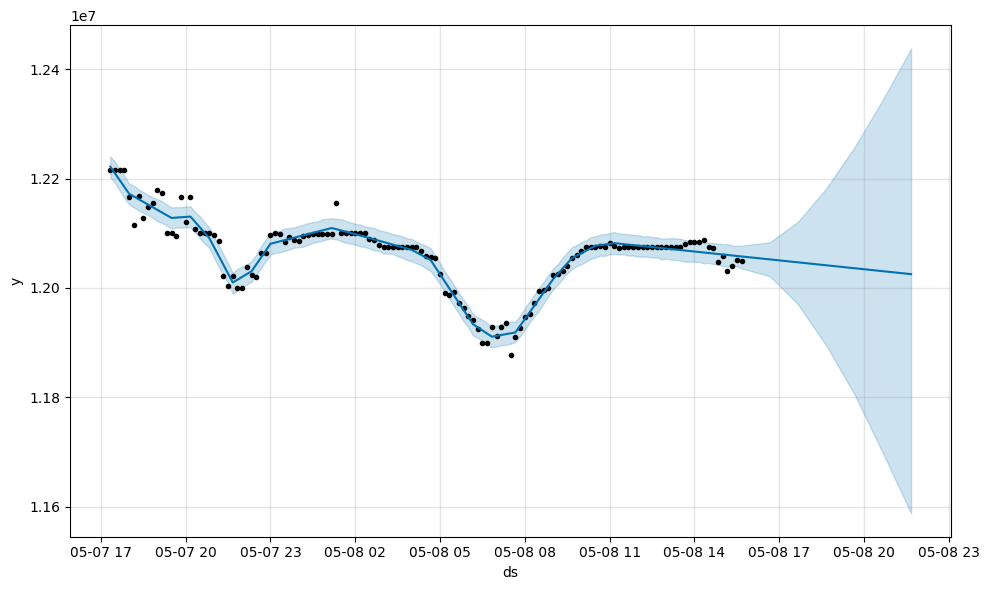

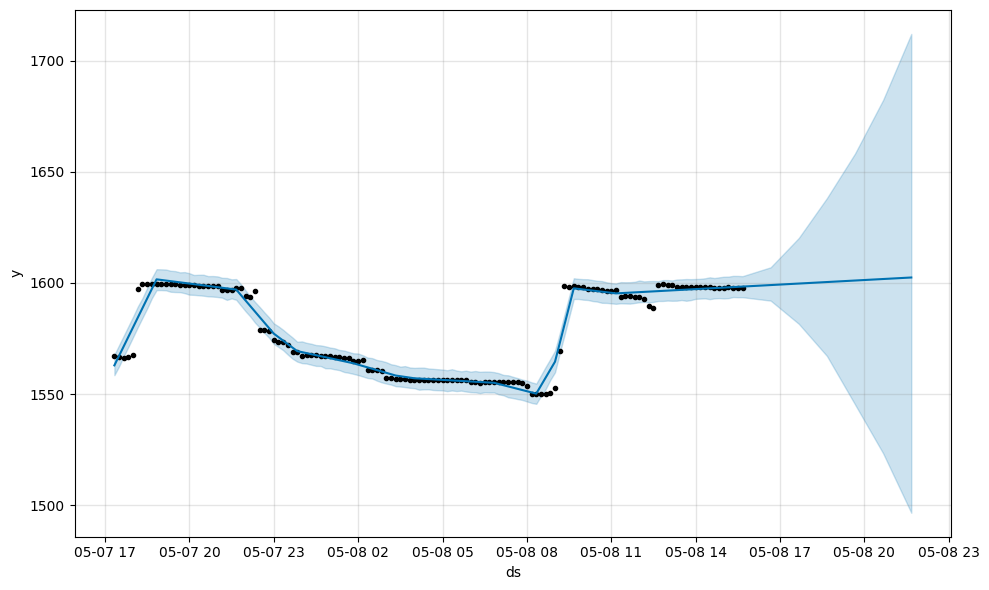

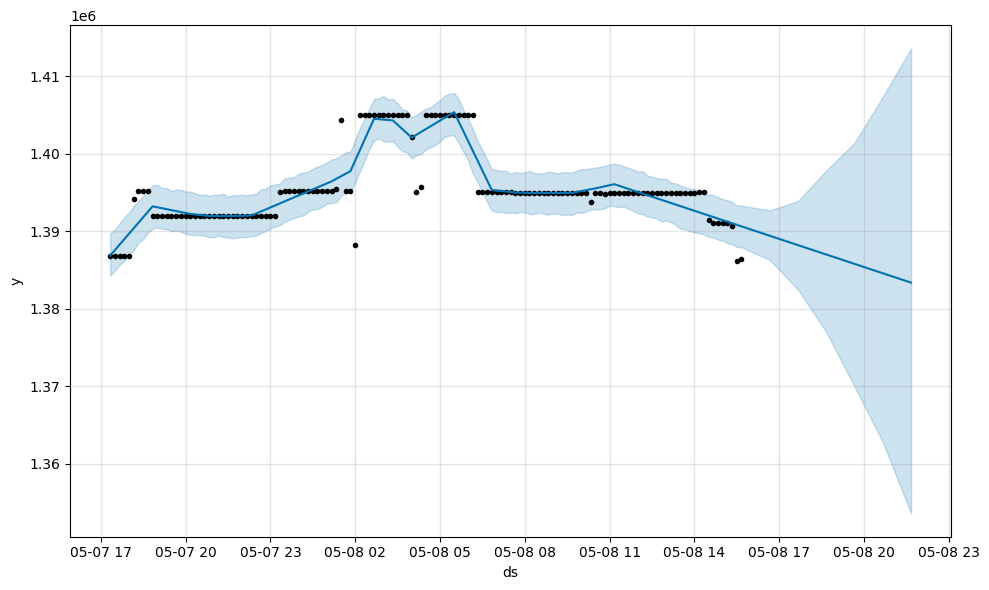

In [16]:
for product in test_products:
    print("\n Plot for", product)
    ml_method.prophet_routine(df, product)
    

## Neural Prophet


In [39]:
train = data_prep.prep_neuralprophet(df, test_products[1], useSellPriceRegressor=False)
train

,buyVolume,sellVolume,y,ds
194307,6988,16043,1.221500e+07,2025-05-07 17:20:00
102919,7323,15433,1.221499e+07,2025-05-07 17:30:00
150087,7586,15532,1.221499e+07,2025-05-07 17:40:00
77861,8108,15155,1.221499e+07,2025-05-07 17:50:00
46907,8285,15350,1.216708e+07,2025-05-07 18:00:00
...,...,...,...,...
10057,11274,17057,1.205773e+07,2025-05-08 15:00:00
38063,11509,17138,1.203094e+07,2025-05-08 15:10:00
2687,11468,17175,1.203930e+07,2025-05-08 15:20:00
49855,11355,17286,1.205025e+07,2025-05-08 15:30:00


In [ ]:
model_np = ml_method.neuralProphet_train(train)

TypeError: neuralProphet_train() got an unexpected keyword argument 'useSellPriceRegressor'

In [34]:
forecast = ml_method.neuralProphet_predicting(model_np, train, periods=600)
forecast

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 180.02it/s]


,ds,y,yhat1,ar1,lagged_regressor_buyVolume1,lagged_regressor_sellVolume1,lagged_regressor_inst_sellPrice1,trend
0,2025-05-07 17:20:00,1.221500e+07,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-05-07 17:30:00,1.221499e+07,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-05-07 17:40:00,1.221499e+07,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-05-07 17:50:00,1.221499e+07,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-05-07 18:00:00,1.216708e+07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
131,2025-05-08 15:10:00,1.203094e+07,12094824.0,174001.328125,17260.587891,-10218.032227,6930.172363,11906850.0
132,2025-05-08 15:20:00,1.203930e+07,12041786.0,137017.921875,-1554.508301,920.247620,-624.139221,11906027.0
133,2025-05-08 15:30:00,1.205025e+07,12025950.0,154824.046875,-42096.234375,24920.394531,-16901.750000,11905203.0
134,2025-05-08 15:40:00,1.204962e+07,11985137.0,154657.750000,-91290.265625,54042.585938,-36653.285156,11904380.0


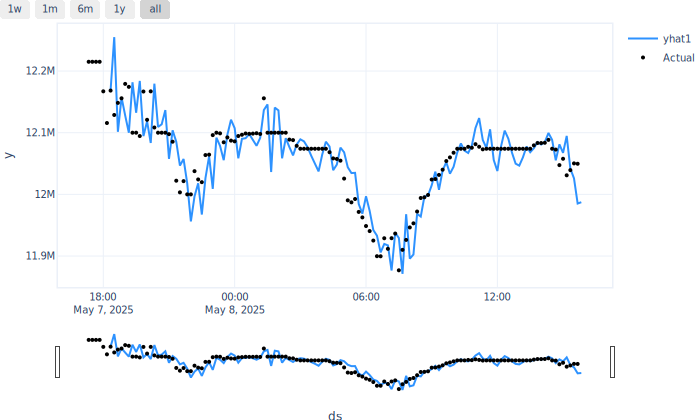

In [27]:
model_np.plot(forecast)

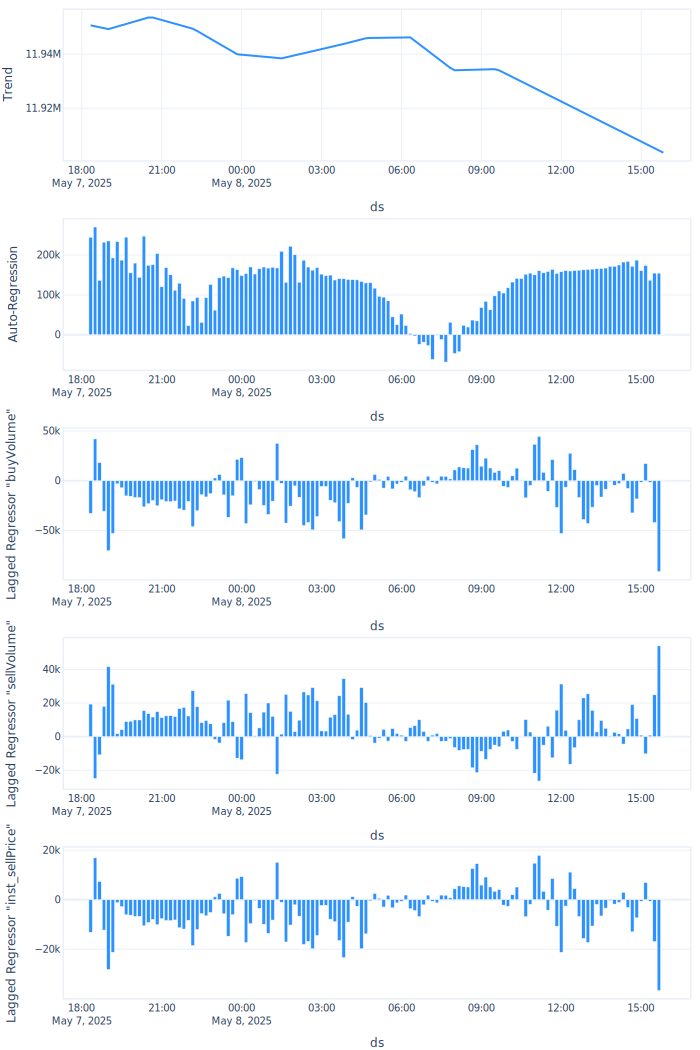

In [28]:
model_np.plot_components(forecast)